<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-March/blob/main/Linear%20Regression/Polynomial%26Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Polynomial Regression.**


In [ ]:
# import improtant library 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

In [ ]:
# let's create raw set 
x = np.linspace(-3, 3, 100).reshape(100, 1)
y = 0.5*x**2 + x + 2 + np.random.randn(100, 1)

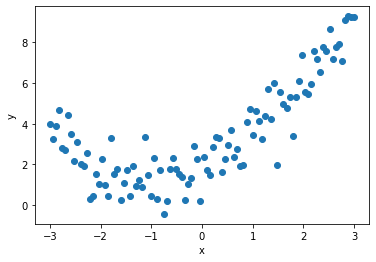

In [ ]:
# ploting the graph
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
# import linear Regreesion 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [ ]:
# train model
lin_reg.fit(x, y)
# predict the value 
y_pred = lin_reg.predict(x)


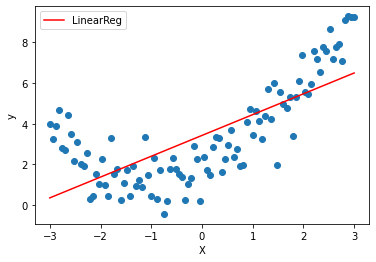

In [ ]:
# let's see linear Regression line
plt.scatter(x, y)
plt.plot(x, y_pred, 'r-', label='LinearReg')
plt.legend()
plt.xlabel('X')
plt.ylabel("y")
plt.show()

In [ ]:
# let's see intercept and cofficient
print("intercept: {} , coficient : {}".format(lin_reg.intercept_, lin_reg.coef_))

intercept: [3.42645651] , coficient : [[1.02298878]]


In [ ]:
# import polynomial fetures
from sklearn.preprocessing import PolynomialFeatures
poly_fetures = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_fetures.fit_transform(x)
print("old data shape: {},  new data shape: {}".format(x.shape, x_poly.shape))

old data shape: (100, 1),  new data shape: (100, 2)


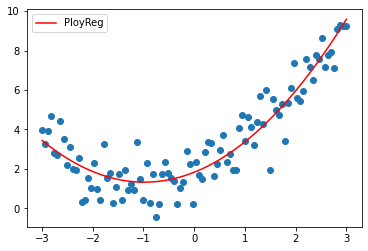

In [ ]:
lin_reg.fit(x_poly, y)
y_pred2 = lin_reg.predict(x_poly)

plt.scatter(x, y)
plt.plot(x, y_pred2, 'r-', label="PloyReg")
plt.legend()
plt.show()

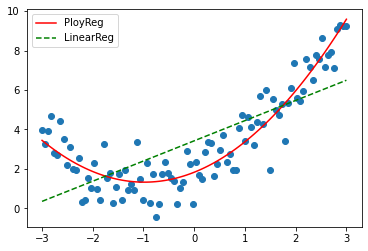

In [ ]:
lin_reg.fit(x_poly, y)
y_pred2 = lin_reg.predict(x_poly)

plt.scatter(x, y)
plt.plot(x, y_pred2, 'r-', label="PloyReg")
plt.plot(x, y_pred, 'g--', label="LinearReg")
plt.legend()
plt.show()

#**Pipeline**



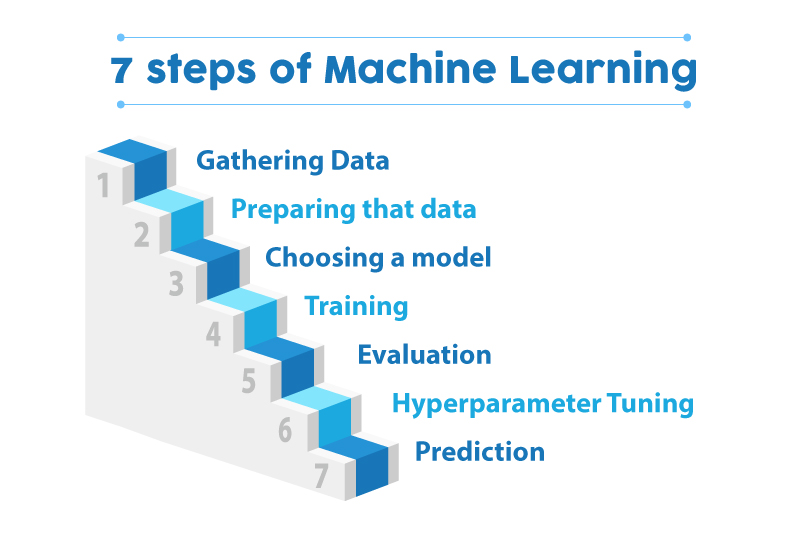

In [ ]:
# print('steps')

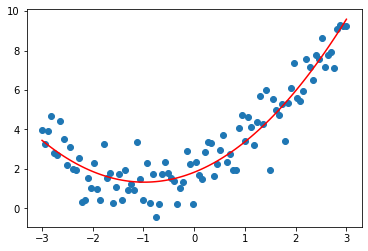

In [ ]:
# feature x, label y
# 1. polynomial Feature Engineering 
# 2. Standard scale 
# 3. linear Regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
poly_features = PolynomialFeatures(degree=2, include_bias=False)
lin_reg = LinearRegression()
std_scaler = StandardScaler()

x_poly = poly_features.fit_transform(x)

x_scale = std_scaler.fit_transform(x_poly)

lin_reg.fit(x_scale,y)

y_pred2 = lin_reg.predict(x_scale)

plt.scatter(x, y)
plt.plot(x, y_pred2, 'r-', label="PolyReg")
plt.show()

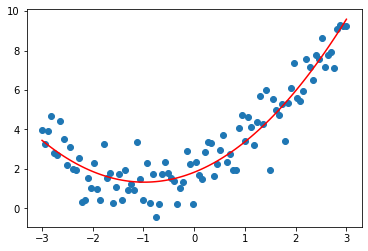

In [ ]:
# feature x, label y
# 1. polynomial Feature Engineering 
# 2. Standard scale 
# 3. linear Regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import Pipeline
poly_features = PolynomialFeatures(degree=2, include_bias=False)
lin_reg = LinearRegression()
std_scaler = StandardScaler()


model = Pipeline([
                  ("FeturesEngineering", poly_features),
                  ("StandardScaler", std_scaler),
                  ("LinearRegression", lin_reg),
])

model.fit(x,y)

y_pred2 = model.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred2, 'r-', label="PolyReg")
plt.show()

#**UnderFitting**

**Low Variance High Bias**

**Problems** : 

1. High Bias 
2. Very Simple Modle 


**Solution** : 
1. increase model complexity(such as degree)
2. Increase number of Iteration(epochs)
3. Data Suffiling after every epochs



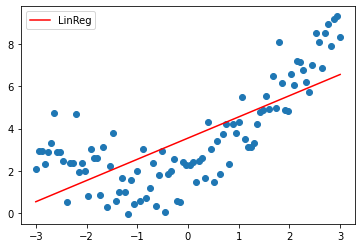

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
y_pred = lin_reg.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, "r-", label="LinReg")
plt.legend()
plt.show()

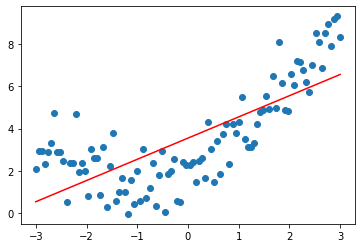

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import Pipeline

poly_features = PolynomialFeatures(degree=1, include_bias=False)
lin_reg = LinearRegression()
std_scaler = StandardScaler()


model = Pipeline([
                  ("FeturesEngineering", poly_features),
                  ("StandardScaler", std_scaler),
                  ("LinearRegression", lin_reg),
])

model.fit(x,y)

y_pred2 = model.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred2, 'r-', label="PolyReg")
plt.show()

#**Overfitting**

High Variance Low Bias

**Problem**
1. Complex modle(Higher model)
2. less amount of training data

  `(some more we will do later on)`


**Solution**
1. Make low complex model
2. Increase training data(cross validation)
3. Regularization
4. Dimensionality Reduction
5. Ensemble Technique


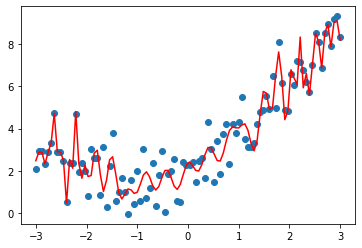

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import Pipeline

poly_features = PolynomialFeatures(degree=250, include_bias=False)
lin_reg = LinearRegression()
std_scaler = StandardScaler()


model = Pipeline([
                  ("FeturesEngineering", poly_features),
                  ("StandardScaler", std_scaler),
                  ("LinearRegression", lin_reg),
])

model.fit(x,y)

y_pred2 = model.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred2, 'r-', label="PolyReg")
plt.show()

#**Bias Variance**



**Bias Error** : `While making predictions, a difference occurs between prediction values made by the model and actual values/expected values, and this difference is known as bias errors or Errors due to bias.`

**Variance Error** : `variance tells that how much a random variable is different from its expected value.`



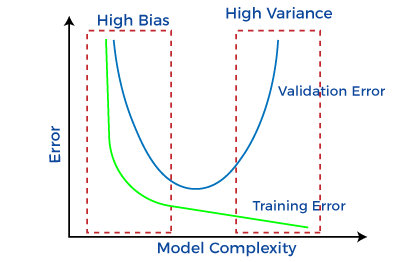

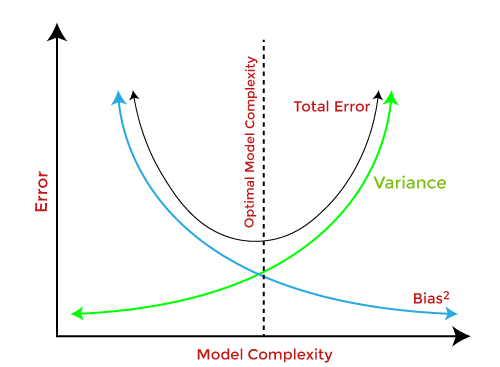

#**All in one**

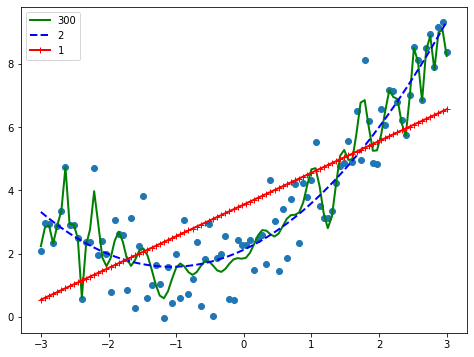

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import Pipeline


plt.figure(figsize=(8, 6))

for style, width, degree in (("g-", 2, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()

    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])

    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(x)

    plt.plot(x, y_newbig, style, label=str(degree), linewidth=width)

plt.scatter(x, y)
plt.legend(loc="upper left")
plt.show()


#**Regularization**
1. Ridge
2. Lasso
3. ElasticNet

#**Ridge or L2**

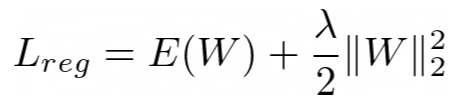

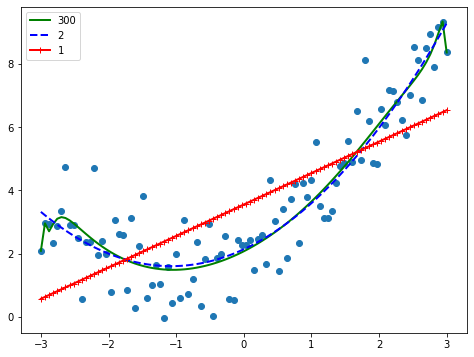

In [ ]:
# ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline


plt.figure(figsize=(8, 6))

for style, width, degree in (("g-", 2, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    ridge_reg = Ridge(alpha = 1)

    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", ridge_reg),
        ])

    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(x)

    plt.plot(x, y_newbig, style, label=str(degree), linewidth=width)

plt.scatter(x, y)
plt.legend(loc="upper left")
plt.show()



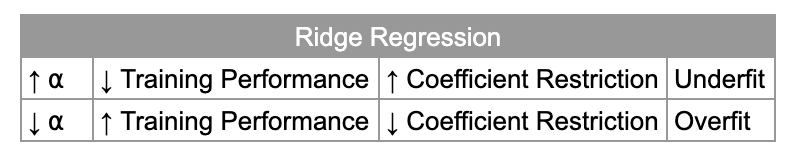

#**Lasso or L1**

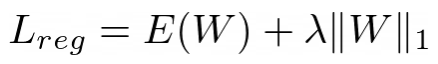

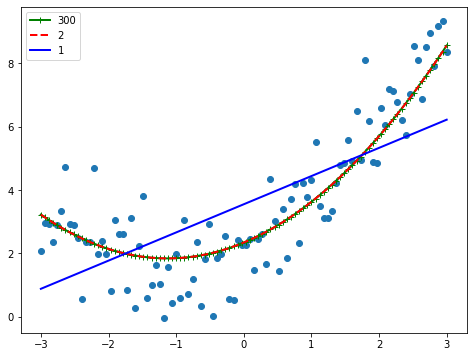

In [ ]:
# lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline


plt.figure(figsize=(8, 6))

for style, width, degree in (("g-+", 2, 300), ("r--", 2, 2), ("b-", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lasso_reg = Lasso(alpha = 0.2)

    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lasso_reg),
        ])

    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(x)

    plt.plot(x, y_newbig, style, label=str(degree), linewidth=width)

plt.scatter(x, y)
plt.legend(loc="upper left")
plt.show()




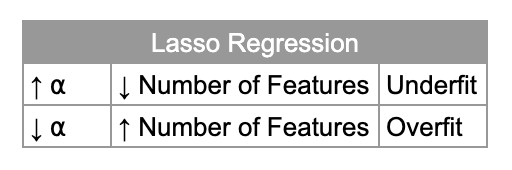

#**Elastic Net**

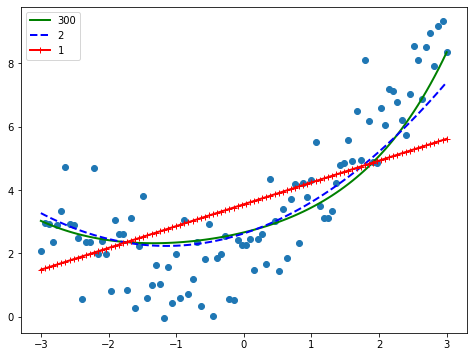

In [ ]:
# elasticnet 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline


plt.figure(figsize=(8, 6))

for style, width, degree in (("g-", 2, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    elastic_reg = ElasticNet(alpha = 0.5)

    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", elastic_reg),
        ])

    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(x)

    plt.plot(x, y_newbig, style, label=str(degree), linewidth=width)

plt.scatter(x, y)
plt.legend(loc="upper left")
plt.show()


#**R2 Score**

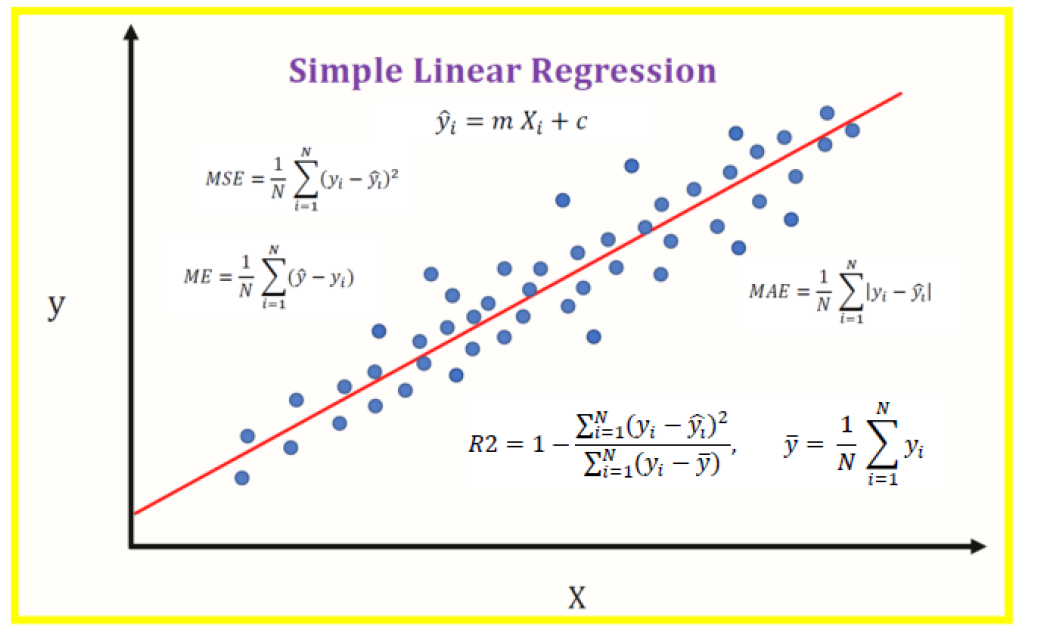

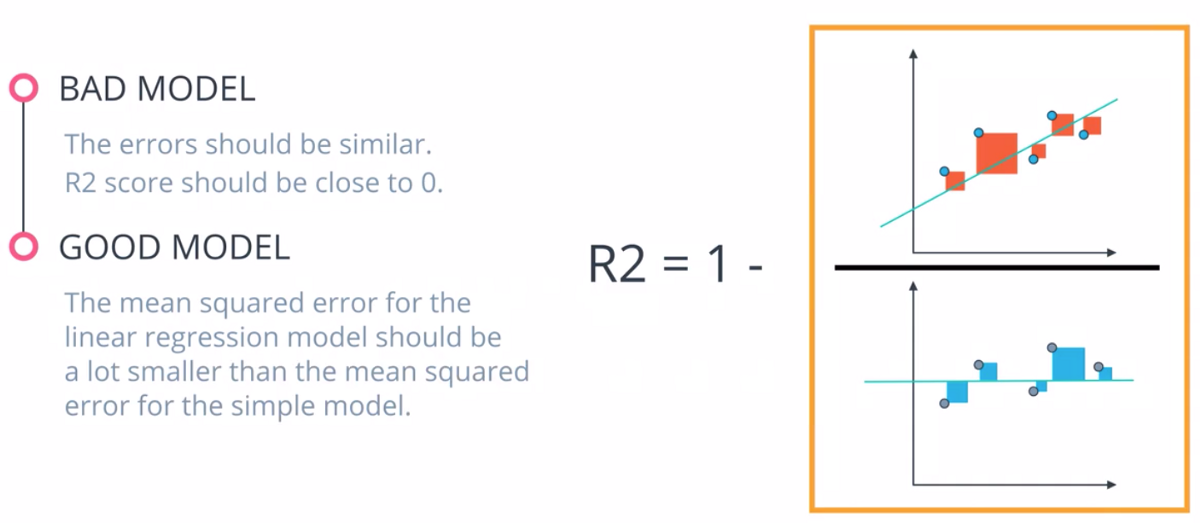

#**GridSearchCV**